In [59]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import cartopy.feature as cfeature

import cartopy.crs as ccrs

In [43]:
clusters = xr.open_dataarray('../scripts/data/4cluster_mean_anom_DJF.nc')
clusters

<xarray.DataArray (cid: 4, latitude: 91, longitude: 361)> Size: 1MB
[131404 values with dtype=float64]
Coordinates:
  * cid        (cid) int64 32B 0 1 2 3
  * latitude   (latitude) float64 728B 90.0 89.0 88.0 87.0 ... 3.0 2.0 1.0 0.0
  * longitude  (longitude) float64 3kB -180.0 -179.0 -178.0 ... 179.0 180.0

In [67]:
palette = ['#1b2c62', '#204487', '#2d66af', '#2d66af', '#6bb4e1', '#94d3f3', '#b8e4f8', '#d9f0f9', '#f0f9fd', '#ffffff', '#ffffff', '#fef8de', '#fceda3', '#fdce67', '#fdaa31', '#f8812c', '#ed5729', '#da2f28', '#b81b22', '#921519']
cmap = LinearSegmentedColormap.from_list("", palette)
absmax = 240
vmin = -absmax
vmax = absmax
step = 30
levels = np.arange(vmin, vmax+step, step)

for id in range(4):
    plt.figure(figsize=(2, 2))
    ax = plt.axes(projection=ccrs.Orthographic(central_latitude=60, central_longitude=-20))
    clusters[id].plot.contourf(transform=ccrs.PlateCarree(), add_colorbar=False, cmap=cmap, vmin=vmin, vmax=vmax, levels=levels)
    ax.coastlines()
    #ax.gridlines()
    ax.add_feature(cfeature.OCEAN, facecolor=(1,1,1))
    ax.add_feature(cfeature.LAND, facecolor=(1,1,1))
    ax.set_title('')
    ax.set_global()
    plt.tight_layout(pad=0)
    plt.savefig('4clusters_id%d.png' % id, transparent=True, dpi=300)
    plt.close()

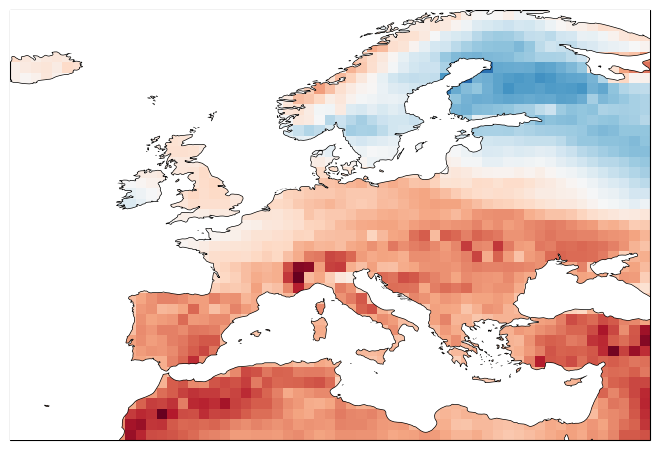

In [96]:
temp = xr.open_dataarray('../data/monthly_t2m_anom_europe_19400101-20241231_regrid.nc')
prec = xr.open_dataarray('../data/monthly_tp_anom_europe_19400101-20241231_merged.nc')

ax = plt.axes(projection=ccrs.PlateCarree())
temp.sel(time='2024-01-01').plot(ax=ax, add_colorbar=False, cmap='RdBu_r')
ax.set_title('')
plt.tight_layout(pad=0)
ax.coastlines()
ax.add_feature(cfeature.OCEAN, facecolor=(1,1,1), zorder=10)
plt.savefig('temp.png', transparent=True, dpi=300)

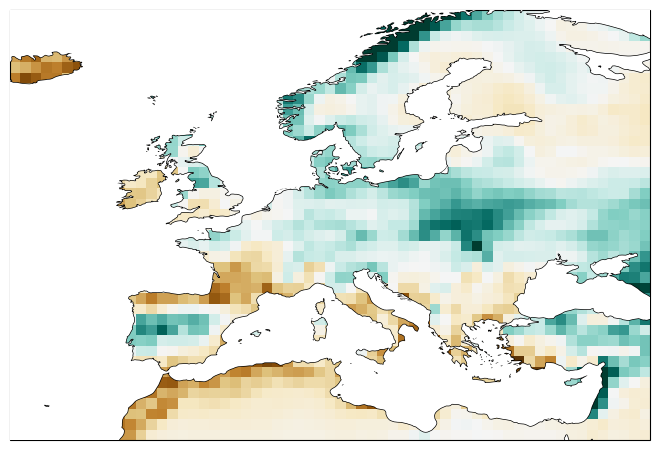

In [97]:
ax = plt.axes(projection=ccrs.PlateCarree())
prec.sel(time='2024-01-01').plot(ax=ax, add_colorbar=False, cmap='BrBG', vmin=-1, vmax=1)
ax.set_title('')
plt.tight_layout(pad=0)
ax.coastlines()
ax.add_feature(cfeature.OCEAN, facecolor=(1,1,1), zorder=10)
plt.savefig('prec.png', transparent=True, dpi=300)